In [1]:
# imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [2]:
# defining some global variables that will be used throughout the notebook
PREDICTOR_COLUMNS = [ 'zh','max_zh','min_zh','mean_zh', 'std_zh',
                'zdr', 'max_zdr', 'min_zdr', 'mean_zdr', 'std_zdr',
                'rhv', 'max_rhv', 'min_rhv', 'mean_rhv', 'std_rhv',
                'phidp', 'max_phidp', 'min_phidp', 'mean_phidp', 'std_phidp',
                'rh_2m_at_radar','zh_range','zdr_range','rhv_range','phidp_range']

# our target variable for the project
TARGET_COLUMN = 'valid_precip'

In [14]:
def comparison_hist(df_in):
    
    ''' Histogram of the continous predictor columns in our dataframe'''
    
    cols = PREDICTOR_COLUMNS
    
    fig, ax = plt.subplots(5,5,figsize=(24,18))
    plt.subplots_adjust(wspace=0.5, hspace=0.75)
    
    ones_data  = df_in[df_in['valid_precip'] > 0]
    zeros_data = df_in[df_in['valid_precip'] < 1]
    
    first_col = True
    for col, subax in zip(cols, ax.flatten()):

        data_1 = ones_data.loc[:,col].to_numpy()
        data_0 = zeros_data.loc[:,col].to_numpy()
        
        subax.hist(data_0, bins=20, alpha=0.5,
                   edgecolor='k', color='xkcd:water blue', label='nonprecip')
        subax.hist(data_1, bins=20, alpha=0.5,
                   edgecolor='k', color='xkcd:fire engine red', label='precip')
        
        # Despine
        subax.spines['right'].set_visible(False)
        subax.spines['top'].set_visible(False)
        subax.spines['left'].set_visible(False)
        
        subax.set_title(col)
        
        if first_col is True:
            subax.legend(loc='upper right')
            first_col = False
            
    return fig, ax

In [63]:
def plot_sample_scatter_plots(df_in, list_of_columns):
    
    ''' Histogram of the continous predictor columns in our dataframe'''
        
    fig, ax = plt.subplots(5,5,figsize=(24,18))
    plt.subplots_adjust(wspace=0.5, hspace=0.75)
    
    ones_data  = df_in[df_in['valid_precip'] > 0]
    zeros_data = df_in[df_in['valid_precip'] < 1]
    
    first_col = True
    for col_pair, subax in zip(list_of_columns, ax.flatten()):

        pred1_np = zeros_data[col_pair[0]]
        pred2_np = zeros_data[col_pair[1]]
 
        pred1_precip = ones_data[col_pair[0]]
        pred2_precip = ones_data[col_pair[1]]
        
        subax.scatter(pred1_np, pred2_np, s=5, color='xkcd:water blue', label='nonprecip')
        subax.scatter(pred1_precip, pred2_precip, s=5, color='xkcd:fire engine red', label='precip')
        subax.set_xlabel(col_pair[0])
        subax.set_ylabel(col_pair[1])

        # Despine
        subax.spines['right'].set_visible(False)
        subax.spines['top'].set_visible(False)
        subax.spines['left'].set_visible(False)
        
        #subax.set_title(col)
        
        if first_col is True:
            subax.legend(loc='upper right')
            first_col = False
            
    return fig, ax

In [17]:
def train_test_comparison(dfs_as_list):
    
    ''' Histogram of the continous predictor columns in our dataframe'''
    
    cols = PREDICTOR_COLUMNS
    
    fig, ax = plt.subplots(5,5,figsize=(24,18))
    plt.subplots_adjust(wspace=0.5, hspace=0.75)
    
    data_train = dfs_as_list[0]
    data_test  = dfs_as_list[1]
    
    first_col = True
    for col, subax in zip(cols, ax.flatten()):
       
        subax.hist(data_train.loc[:,col].to_numpy(), bins=20, alpha=0.5,
                   edgecolor='k', color='xkcd:water blue', label='training')
        subax.hist(data_test.loc[:,col].to_numpy(), bins=20, alpha=0.5,
                   edgecolor='k', color='xkcd:fire engine red', label='test')
     
        # Despine
        subax.spines['right'].set_visible(False)
        subax.spines['top'].set_visible(False)
        subax.spines['left'].set_visible(False)
        
        subax.set_title(col)
        
        if first_col is True:
            subax.legend(loc='upper right')
            first_col = False
            
    return fig, ax

In [19]:
def comparison_boxplot(df_in):
    
    ''' Boxplot of the continous predictor columns in our dataframe'''
    
    cols = PREDICTOR_COLUMNS
    labels = ['nonprecip', 'precip']
    colors = ['xkcd:water blue', 'xkcd:fire engine red']
    
    fig, ax = plt.subplots(5,5,figsize=(24,18))
    plt.subplots_adjust(wspace=0.5, hspace=0.75)
    
    ones_data  = df_in[df_in['valid_precip'] > 0]
    zeros_data = df_in[df_in['valid_precip'] < 1]
    
    first_col = True
    for col, subax in zip(cols, ax.flatten()):

        data_1 = ones_data.loc[:,col].to_numpy()
        data_0 = zeros_data.loc[:,col].to_numpy()
        
        box_data = [data_0, data_1]
        bplot = subax.boxplot(box_data, 
                              notch=False, 
                              sym='', 
                              patch_artist=True,
                              labels=labels)
        
        # add colors
        for patch, color in zip(bplot['boxes'], colors):
            patch.set_facecolor(color)
        
        # Despine
        subax.spines['right'].set_visible(False)
        subax.spines['top'].set_visible(False)
        subax.spines['left'].set_visible(False)
        
        subax.set_title(col)
            
    return fig, ax

# Read in the dataset 
It's a relatively big dataset (~1.12 mil examples).

In [5]:
# Read in the data
data = pd.read_csv('../data/SR_dataset.csv')
data.shape

(500000, 37)

In [7]:
# What's the distribution of valid to non-valid precip obs?
print(data['valid_precip'].value_counts())
print(data['valid_precip'].mean())

0    769055
1    349846
Name: valid_precip, dtype: int64
0.31266930675725557


# Exploratory Data Analysis/Cleanup
Here, we want to examine the dataset we currently have and also clean up a few missing observation issues.

In [38]:
# View the available columns
columns = data.columns.to_list()
print(columns)

['Unnamed: 0', 'ASOS', 'ASOSLat', 'ASOSLon', 'Condition', 'MinDistance', 'Radar', 'RadarLat', 'RadarLon', 'date', 'nearest_i', 'nearest_j', 'rh_2m_at_radar', 'rounded_date', 'valid_precip', 'calendar_date', 'zh', 'max_zh', 'min_zh', 'mean_zh', 'std_zh', 'zdr', 'max_zdr', 'min_zdr', 'mean_zdr', 'std_zdr', 'rhv', 'max_rhv', 'min_rhv', 'mean_rhv', 'std_rhv', 'phidp', 'max_phidp', 'min_phidp', 'mean_phidp', 'std_phidp', 'zh_range', 'zdr_range', 'phidp_range', 'rhv_range', 'date_calendar', 'month']


In [9]:
# view summary statistics of each column feature
list_of_columns = data.columns.to_list()
for column in list_of_columns:
    print(data[column].describe())

count    1.118901e+06
mean     5.594500e+05
std      3.229990e+05
min      0.000000e+00
25%      2.797250e+05
50%      5.594500e+05
75%      8.391750e+05
max      1.118900e+06
Name: Unnamed: 0, dtype: float64
count     1118901
unique        152
top          KBIV
freq        17772
Name: ASOS, dtype: object
count    1.118901e+06
mean     4.096482e+01
std      2.379215e+00
min      3.596581e+01
25%      3.912083e+01
50%      4.116421e+01
75%      4.240729e+01
max      4.672452e+01
Name: ASOSLat, dtype: float64
count    1.118901e+06
mean     8.166099e+01
std      7.745949e+00
min      6.779194e+01
25%      7.379912e+01
50%      8.217944e+01
75%      8.775528e+01
max      9.599005e+01
Name: ASOSLon, dtype: float64
count      1118901
unique         152
top       Overcast
freq        398599
Name: Condition, dtype: object
count    1.118901e+06
mean     2.925946e+01
std      1.358441e+01
min      2.658033e+00
25%      1.878248e+01
50%      3.010120e+01
75%      4.090533e+01
max      4.996602e+0

Based on the summary statistics, we need to do some extra preprocessing prior to machine learning. This dataset includes examples when radar data was unavailable (NaN) but also valid missing radar echo. It's valid because there may have been no echo for either clear sky conditions, or the radar beam was overshooting valid precipitation echo. We only want to use examples when there was some radar data within the 5x5 domain. In a realtime setting, the algorithm wouldn't run if no valid echo was present.

In [10]:
# only grab examples with valid weather echo... would be too easy to predict
data = data[data['mean_zh'] > -50.0]
data.reset_index(drop=True, inplace=True)

data = data[data['mean_zdr'] > -50.0]
data.reset_index(drop=True, inplace=True)

data = data[data['mean_rhv'] > -50.0]
data.reset_index(drop=True, inplace=True)

data = data[data['mean_phidp'] > -50.0]
data.reset_index(drop=True, inplace=True)

# remove the bad standard deviation obs...would be too easy to predict
data = data[data['std_zh'] >= 0.0]
data.reset_index(drop=True, inplace=True)

data = data[data['std_zdr'] >= 0.0]
data.reset_index(drop=True, inplace=True)

data = data[data['std_rhv'] >= 0.0]
data.reset_index(drop=True, inplace=True)

data = data[data['std_phidp'] >= 0.0]
data.reset_index(drop=True, inplace=True)

# Replace missing values with not as large of a number. Helps with convergence for some algorithms
data.loc[data['zh'] < -50.0, 'zh'] = -50.0
data.loc[data['zdr'] < -10.0, 'zdr'] = -10.0
data.loc[data['rhv'] < 0.0, 'rhv'] = -1.0
data.loc[data['phidp'] < 0.0, 'phidp'] = -1.0

# lastly, drop rows where radar data was unavailable (Nans)
data.dropna(axis=0, how='any', inplace=True)
data.reset_index(drop=True, inplace=True)

data.shape

(871954, 36)

After all the cleaning, the total number of observations is still very high at ~871K.

In [11]:
# Let's add the range of each dualpol variable (max - min)
data['zh_range'] = data['max_zh'] - data['min_zh']
data['zdr_range'] = data['max_zdr'] - data['min_zdr']
data['phidp_range'] = data['max_phidp'] - data['min_phidp']
data['rhv_range'] = data['max_rhv'] - data['min_rhv']

data.loc[((data['max_zh'] <= -50.0) & (data['min_zh'] <= -50.0)), 'zh_range'] = -50.0
data.loc[((data['max_zdr'] <= -50.0) & (data['min_zdr'] <= -50.0)), 'zdr_range'] = -50.0
data.loc[((data['max_phidp'] <= -50.0) & (data['min_phidp'] <= -50.0)), 'phidp_range'] = -50.0
data.loc[((data['max_rhv'] <= -50.0) & (data['min_rhv'] <= -50.0)), 'rhv_range'] = -50.0

In [12]:
# see all the current columns
print(data.columns)

# view summary statistics of each column feature
list_of_columns = data.columns.to_list()
for column in list_of_columns:
    print(data[column].describe())

Index(['Unnamed: 0', 'ASOS', 'ASOSLat', 'ASOSLon', 'Condition', 'MinDistance',
       'Radar', 'RadarLat', 'RadarLon', 'date', 'nearest_i', 'nearest_j',
       'rh_2m_at_radar', 'rounded_date', 'valid_precip', 'calendar_date', 'zh',
       'max_zh', 'min_zh', 'mean_zh', 'std_zh', 'zdr', 'max_zdr', 'min_zdr',
       'mean_zdr', 'std_zdr', 'rhv', 'max_rhv', 'min_rhv', 'mean_rhv',
       'std_rhv', 'phidp', 'max_phidp', 'min_phidp', 'mean_phidp', 'std_phidp',
       'zh_range', 'zdr_range', 'phidp_range', 'rhv_range'],
      dtype='object')
count    8.719540e+05
mean     5.563915e+05
std      3.260978e+05
min      2.000000e+00
25%      2.693215e+05
50%      5.629505e+05
75%      8.344658e+05
max      1.118900e+06
Name: Unnamed: 0, dtype: float64
count     871954
unique       151
top         KBKL
freq       16812
Name: ASOS, dtype: object
count    871954.000000
mean         40.960526
std           2.341262
min          35.965810
25%          39.120830
50%          41.164210
75%          42

(<Figure size 1728x1296 with 25 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a25d4fb70>,
       dtype=object))

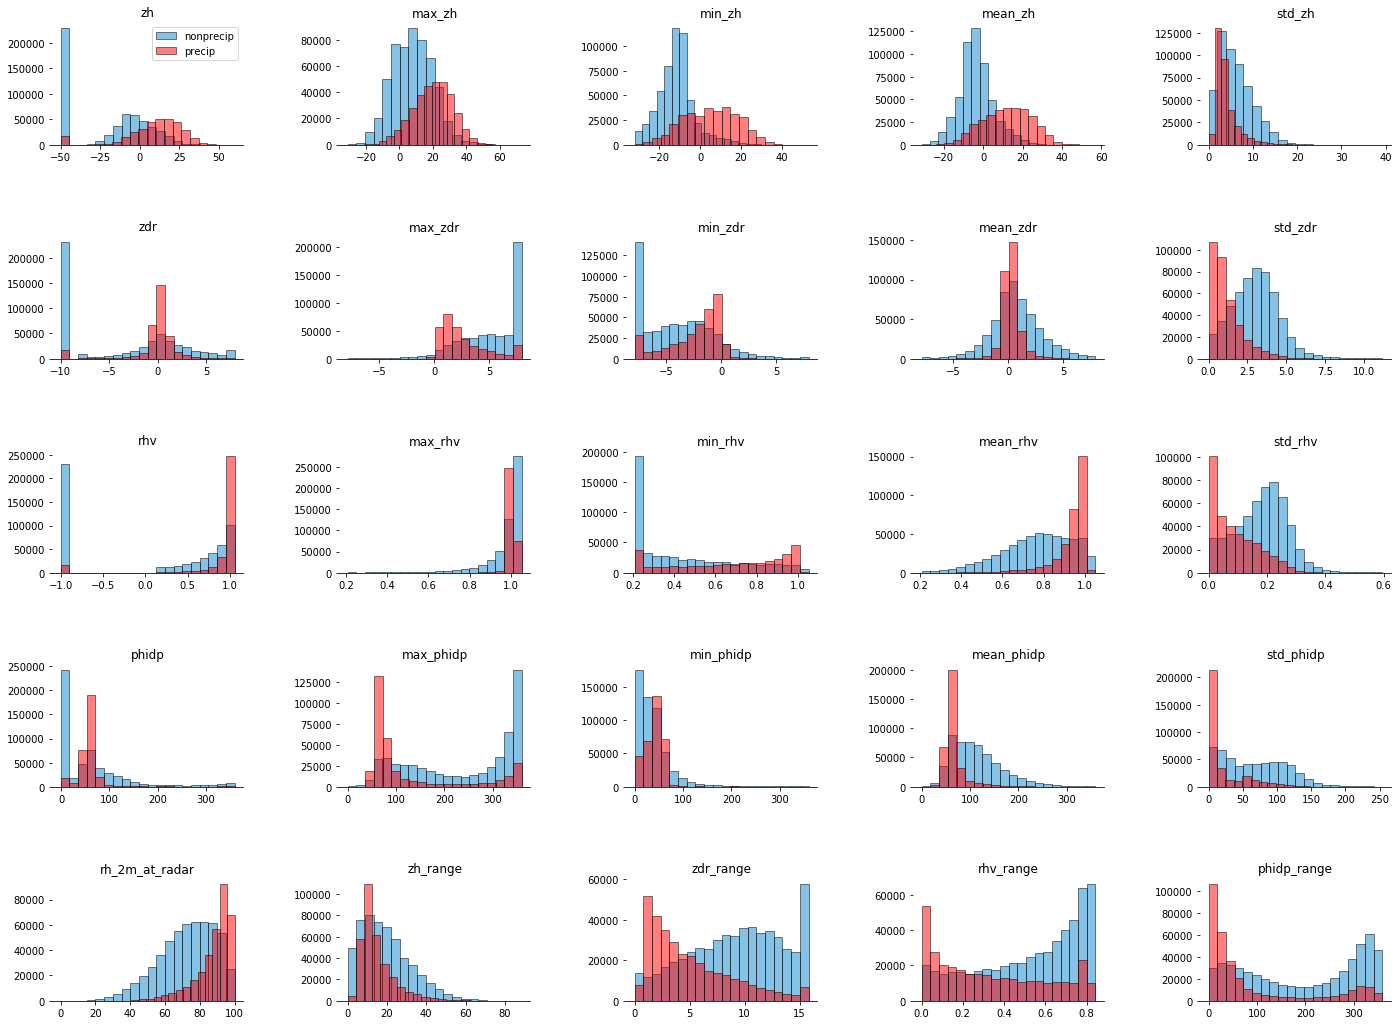

In [15]:
# Let's plot the distribution of some of the columns and color code by the target variable
comparison_hist(data)

Multiple predictors from the distributions of our continuos predictor variables look promising for distingusihing meteorological from non-meteorological echo. These include mean_zh, std_zdr, std_rhv, mean_rhv, std_phidp, rh_2m_at_radar, and mean_zdr.

(<Figure size 1728x1296 with 25 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a29901e80>,
       dtype=object))

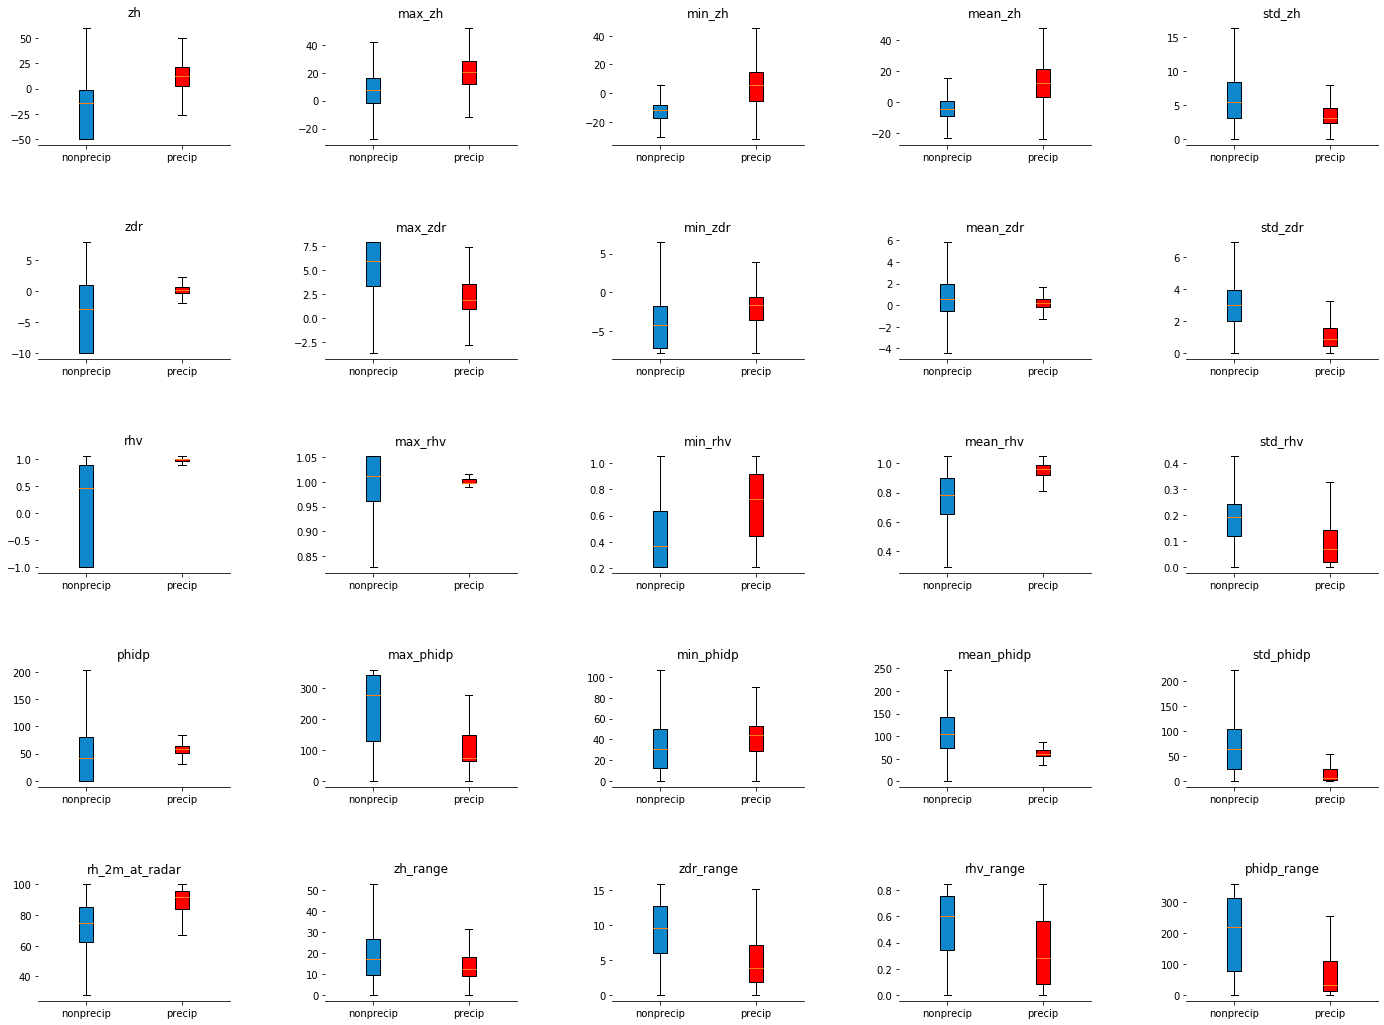

In [20]:
comparison_boxplot(data)

In [28]:
# make a copy of the big dataframe with only the columns we care about for prediction
predictor_matrix = data

# compute the correlation matrix
corr_matrix = predictor_matrix.corr(method='spearman')
np.fill_diagonal(corr_matrix.values, 0.0)

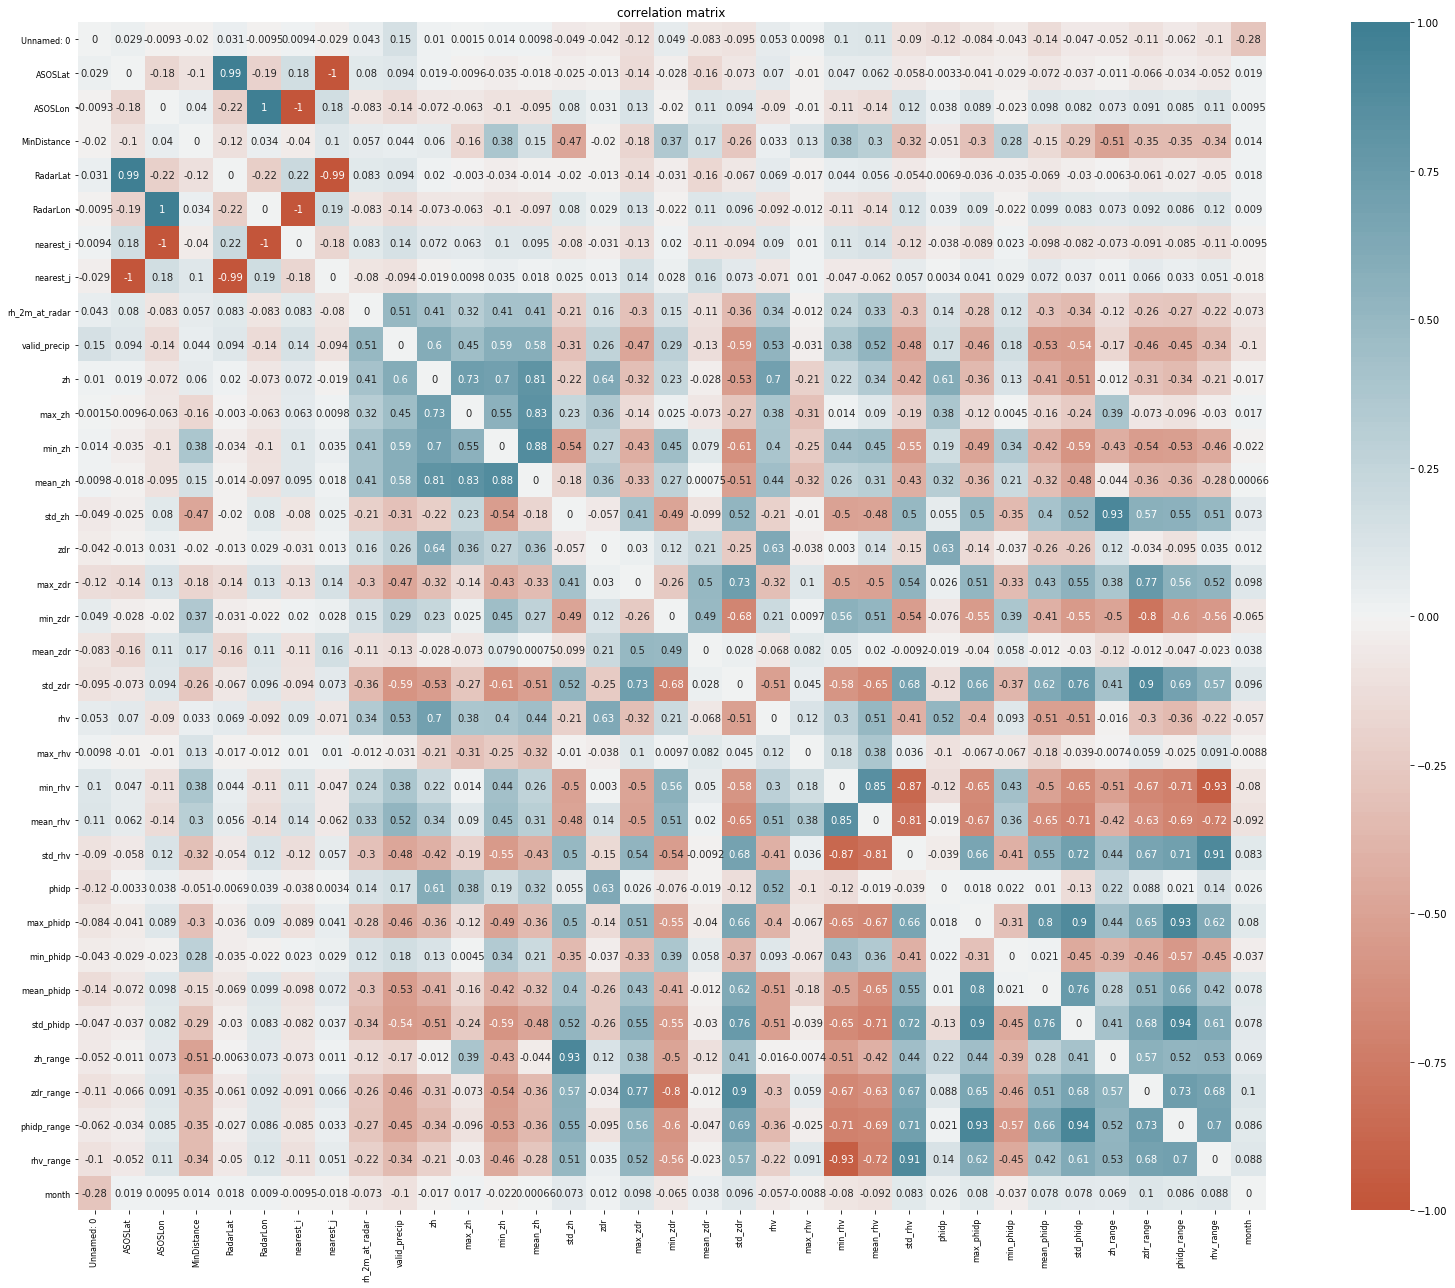

In [29]:
def plot_correlation_matrix(corr_matrix):
    '''Plots the correlation matrix'''
    
    fig, ax = plt.subplots(figsize=(24, 18))

    ax = sns.heatmap(corr_matrix, 
                     vmin=-1, vmax=1, center=0, annot=True,
                     cmap=sns.diverging_palette(20, 220, n=200), square=True
    )

    ticks = np.arange(corr_matrix.shape[0]) + 0.5
    ax.set_xticks(ticks)
    ax.set_xticklabels(corr_matrix.columns, rotation=90, fontsize=8)
    ax.set_yticks(ticks)
    ax.set_yticklabels(corr_matrix.index, rotation=360, fontsize=8)

    ax.set_title('correlation matrix')
    plt.tight_layout()
    
# plot the correlation matrix
plot_correlation_matrix(corr_matrix)

In [46]:
# find the features with strongest correlation to our target variable > 0.5 or < -0.5
corr_filter = corr_matrix[TARGET_COLUMN].abs() > 0.5
print(corr_matrix[TARGET_COLUMN][corr_filter])

rh_2m_at_radar    0.505157
zh                0.598973
min_zh            0.585027
mean_zh           0.582761
std_zdr          -0.593589
rhv               0.533567
mean_rhv          0.523788
mean_phidp       -0.532049
std_phidp        -0.544198
Name: valid_precip, dtype: float64


(<Figure size 1728x1296 with 25 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a39621198>,
       dtype=object))

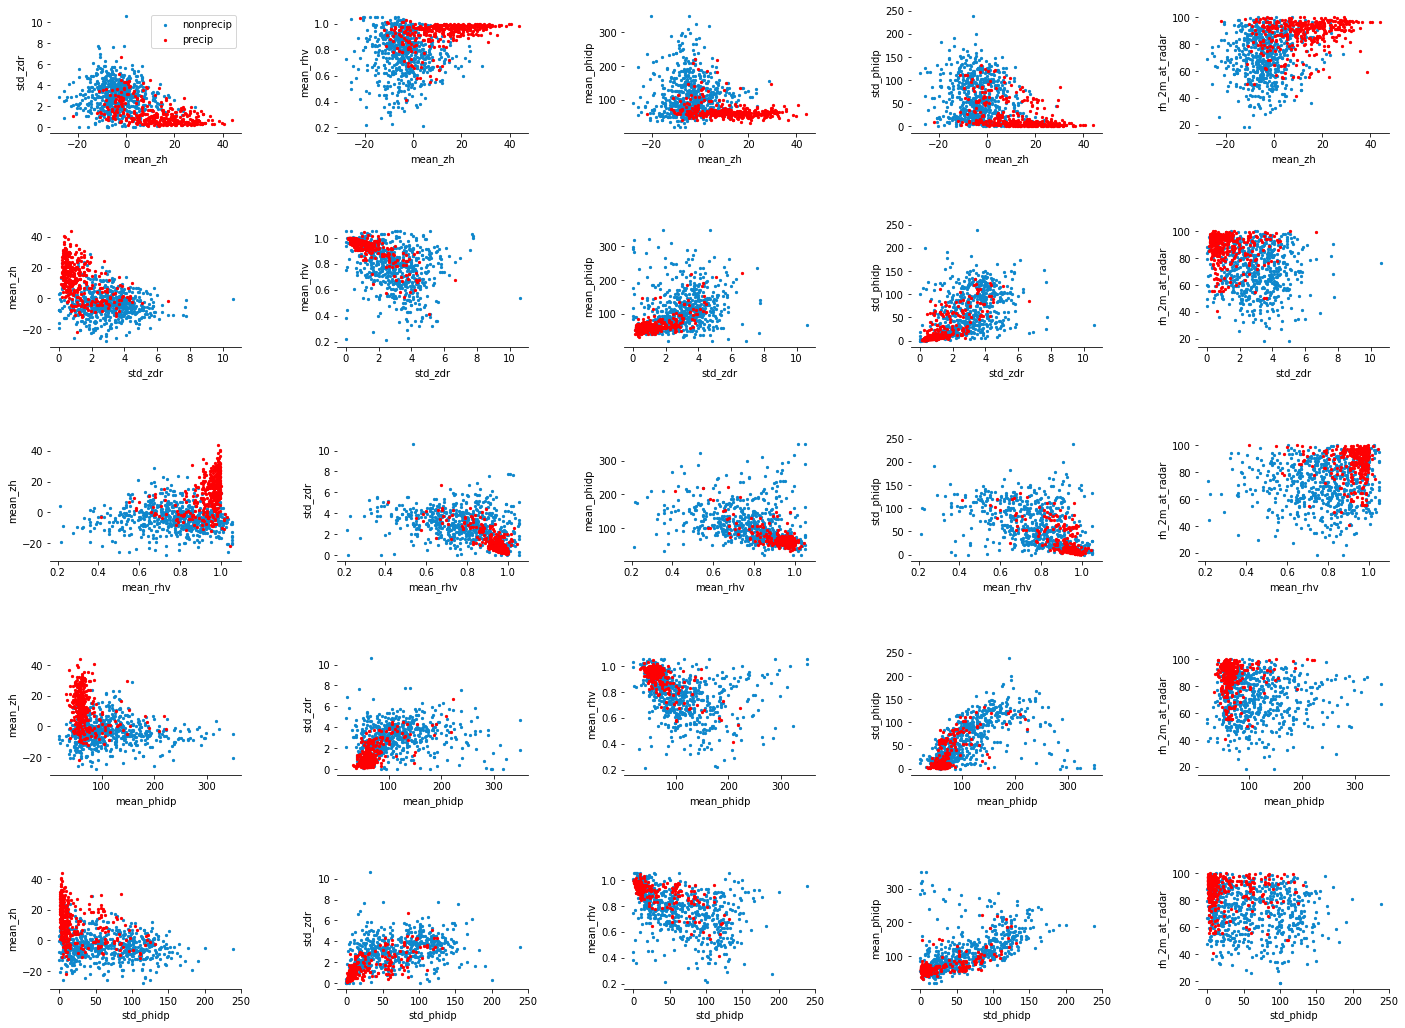

In [72]:
# we can plot sample scatter plots of these fields as well
correlated_predictors = ['mean_zh','std_zdr','mean_rhv','mean_phidp','std_phidp', 'rh_2m_at_radar']
predictor_pairs = itertools.permutations(correlated_predictors, 2)  

# gather a small sample of data to plot
sample_of_data = data.sample(n=1000, replace=False, random_state=42)
sample_of_data.reset_index(drop=True, inplace=False)
plot_sample_scatter_plots(sample_of_data, predictor_pairs)

Overall, the strength of correlation between possible predictors and the target variable are not strong. Many of these features have shown to be useful in distinguishing meteorological from non-meteorological echo in the literature.

The target variables is built off the Condition variable. Let's examine this feature more.

In [21]:
data['Condition'].describe()

count       871954
unique         150
top       Overcast
freq        289538
Name: Condition, dtype: object

In [22]:
# get all the unique types of precipitation/sky condition
unique_values = data['Condition'].unique()
unique_values

array(['Overcast', 'Clear', 'Light Rain', 'Light Rain,Mist',
       'Light Drizzle,Mist', 'Rain,Mist', 'Light Drizzle',
       'Heavy Rain,Mist', 'Rain', 'Drizzle', 'Heavy Drizzle',
       'Drizzle,Mist', 'Heavy Rain,Fog', 'Heavy Rain', 'Light Rain,Fog',
       'Light Drizzle,Fog', 'Light Rain/Thunderstorm',
       'Heavy Rain/Thunderstorm,Mist', 'Thunder,Rain,Mist',
       'Light Rain Shower', 'Rain,Fog', 'Light Rain Shower,Mist',
       'Light Snow', 'Light Rain,Light Ice Pellets',
       'Light Rain,Light Snow', 'Light Snow,Mist',
       'Light Rain,Light Snow,Mist', 'Thunder,Light Rain', 'Snow,Fog',
       'Light Ice Pellets,Light Snow,Mist', 'Light Rain,Mist,Fog',
       'Heavy Rain,Squalls', 'Light Rain/Thunderstorm,Mist',
       'Thunder,Heavy Rain', 'Light Snow,Fog', 'Heavy Snow,Fog',
       'Heavy Rain/Thunderstorm', 'Light Drizzle,Light Snow',
       'Light Snow,Ice Fog', 'Snow,Ice Fog', 'Snow', 'Heavy Snow',
       'Light Snow Shower', 'Heavy Snow,Ice Fog', 'Rain,Ice pellets

Do the statistics change at all based on the type of precip? Most likely!

In [23]:
# lets examine "light" freezing rain/drizzle events
drizzle_categories = ['Frz Drizzle', 'Light Frz Rain', 'Light Frz Rain,Mist', 'Light Frz Drizzle', 'Light Frz Rain,Ice Fog', 'Light Frz Rain,Fog',
                      'Light Frz Drizzle,Fog', 'Frz Drizzle,Mist', 'Light Frz Drizzle,Haze', 'Light Frz Rain,Haze']

frez_drizzle_df = data[data['Condition'].isin(drizzle_categories)]
frez_drizzle_df.shape
frez_drizzle_df[['mean_zh', 'mean_zdr', 'mean_rhv', 'mean_phidp', 
                 'std_zh', 'std_zdr', 'std_rhv', 'std_phidp', 
                 'min_zh', 'min_zdr', 'min_rhv', 'min_phidp']].describe([0.05,0.1,0.25,0.5,0.75,0.9,0.95])

,mean_zh,mean_zdr,mean_rhv,mean_phidp,std_zh,std_zdr,std_rhv,std_phidp,min_zh,min_zdr,min_rhv,min_phidp
count,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.00000,4140.000000,4140.000000
mean,11.649972,0.105019,0.939504,64.909108,3.745591,1.120193,0.087025,20.837663,4.957005,-2.42654,0.681632,40.876197
std,11.420436,0.713984,0.086298,23.815232,2.654589,0.991151,0.078501,30.930035,12.553426,2.37567,0.264773,20.889362
min,-22.000000,-5.906250,0.355702,9.520116,0.000000,0.044194,0.000000,0.000000,-31.500000,-7.87500,0.208333,0.000000
5%,-7.913391,-0.930078,0.753584,44.581643,1.436141,0.214148,0.003293,1.401027,-16.500000,-7.87500,0.208333,7.051937
10%,-4.208333,-0.612500,0.849653,49.026797,1.651514,0.264218,0.005521,1.734738,-12.000000,-6.50000,0.231667,13.046084
25%,2.931087,-0.222500,0.925267,54.384541,2.126519,0.404588,0.019008,2.736621,-4.500000,-3.68750,0.468333,28.912943
50%,12.780000,0.107500,0.968867,59.715805,2.878078,0.796211,0.065221,6.703823,6.000000,-1.62500,0.748333,44.427204
75%,20.660000,0.442500,0.990164,67.279007,4.245839,1.512556,0.136142,18.632593,15.000000,-0.62500,0.925000,52.536934
90%,25.860001,0.858826,0.996600,78.925282,7.154746,2.425712,0.211464,67.659635,20.500000,-0.12500,0.978333,58.918935


How about snow?

In [24]:
snow_categories = ['Heavy Snow,Blowing Snow', 'Snow,Fog', 'Light Snow', 
                   'Light Snow,Blowing Snow,Mist', 'Light Snow,Mist']

snow_df = data[data['Condition'].isin(snow_categories)]
snow_df.shape
snow_df[['mean_zh', 'mean_zdr', 'mean_rhv', 'mean_phidp', 
         'std_zh', 'std_zdr', 'std_rhv', 'std_phidp', 
         'min_zh', 'min_zdr', 'min_rhv', 'min_phidp']].describe([0.05,0.1,0.25,0.5,0.75,0.9,0.95])

,mean_zh,mean_zdr,mean_rhv,mean_phidp,std_zh,std_zdr,std_rhv,std_phidp,min_zh,min_zdr,min_rhv,min_phidp
count,122179.000000,122179.000000,122179.000000,122179.000000,122179.000000,122179.000000,122179.000000,122179.000000,122179.000000,122179.000000,122179.000000,122179.000000
mean,7.942877,0.266054,0.925756,65.355941,3.750567,1.194065,0.096162,22.651619,1.219575,-2.423624,0.648507,39.123545
std,10.732201,0.954219,0.097318,25.260139,2.465317,0.985032,0.080015,31.826587,12.081054,2.394728,0.265302,20.318529
min,-28.375000,-7.875000,0.208333,0.881492,0.000000,0.000000,0.000000,0.000000,-32.000000,-7.875000,0.208333,0.000000
5%,-10.313250,-0.860000,0.721933,43.157852,1.436141,0.242061,0.004269,1.626411,-20.000000,-7.875000,0.208333,5.641550
10%,-6.500000,-0.553653,0.820333,48.150623,1.669082,0.306849,0.007547,2.077730,-15.000000,-6.562500,0.211667,11.635696
25%,0.440000,-0.172500,0.909791,54.821758,2.165448,0.487807,0.026737,3.428963,-7.500000,-3.687500,0.415000,26.444765
50%,8.440000,0.167500,0.958333,59.842739,2.968305,0.888351,0.077238,7.534993,2.000000,-1.625000,0.695000,41.959026
75%,15.700000,0.582500,0.984091,67.416512,4.454586,1.577639,0.151007,25.217662,10.000000,-0.625000,0.895000,52.184338
90%,21.559999,1.227500,0.993533,81.310181,6.956567,2.538827,0.216161,70.966055,16.500000,-0.187500,0.968333,57.473289


# Dataset splitting
For this project, the two years of data were split into two sets of data: train and test. This splitting is done based on the date. One full winter season (2017-18) was used for training/hyperparameter tuning. The other winter season (2016-17), was used for testing and calibration. 

In [25]:
# split dataset into training and test sets
data['date'] = pd.to_datetime(data['date'],format="%Y-%m-%d %H:%M:%S")
data['date_calendar'] = pd.to_datetime(data['date'].dt.strftime('%Y-%m-%d'))

# also add month column for eventual cross-validation
data['month'] = data['date'].dt.month

train_df = data[(data['date_calendar'] < "2016-12-31") | (data['date_calendar'] >= "2017-10-01")]
test_df  = data[(data['date_calendar'] > "2017-01-01") & (data['date_calendar'] < "2017-04-01")]

print(train_df.shape, test_df.shape)

(665031, 42) (203272, 42)


(<Figure size 1728x1296 with 25 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2b21f278>,
       dtype=object))

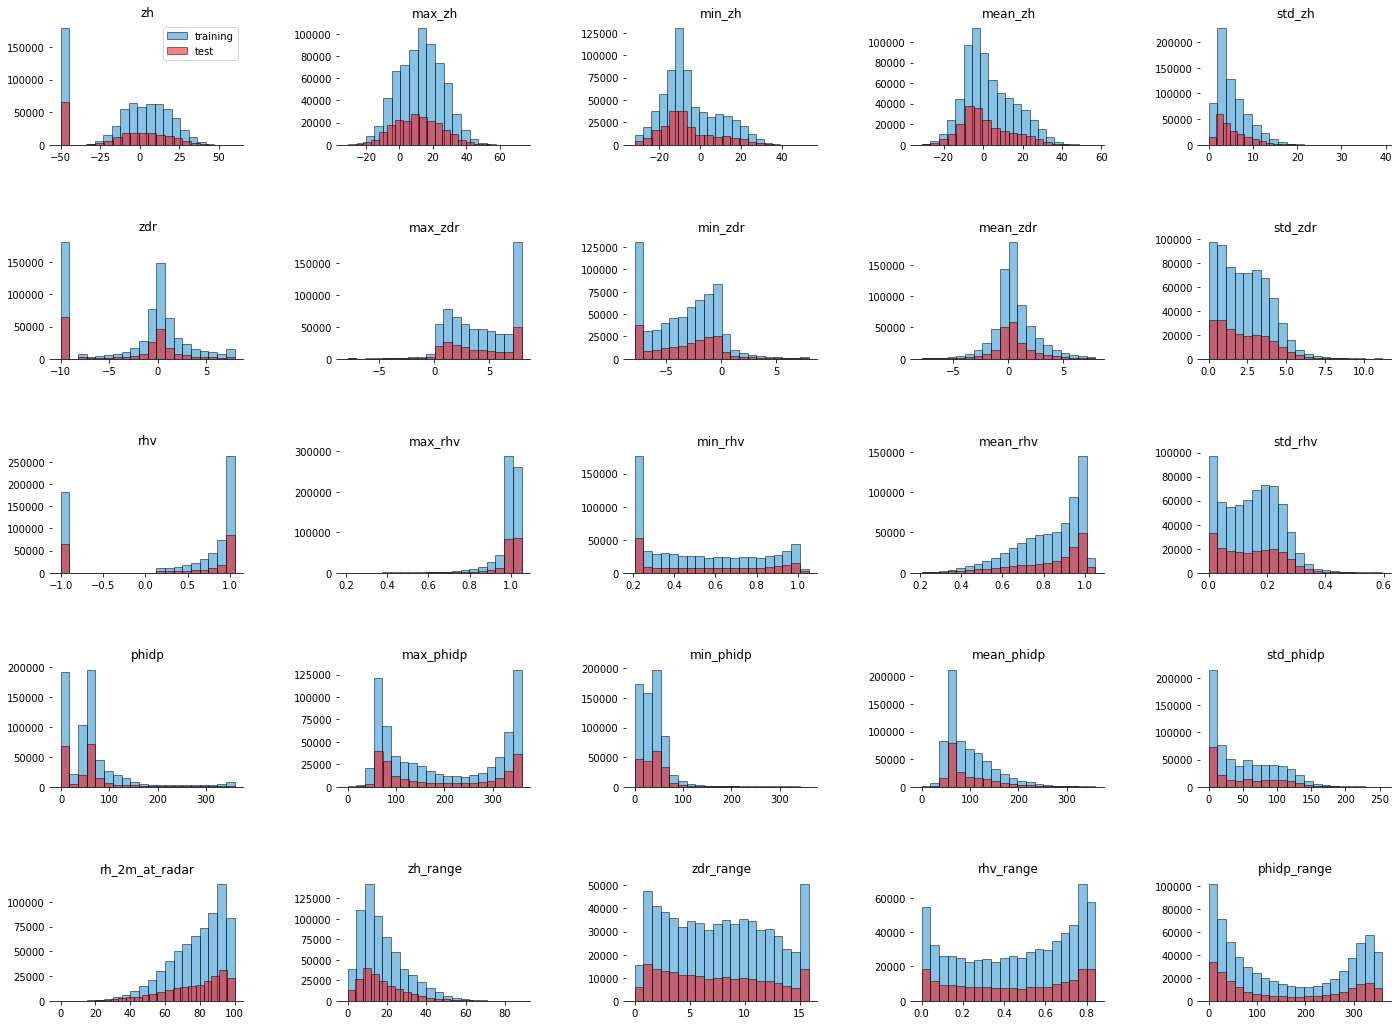

In [26]:
# show that the two sets of data have similar distributions
train_test_comparison([train_df, test_df])

Train and test sets have similar distributions, so we are okay with this splitting.

In [27]:
# write out the datasets for machine learning processing
train_df.to_csv('../data/training_data.csv')
test_df.to_csv('../data/testing_data.csv')